### PRCP-1022-JohnsHopkinsCovid19
Covid Prediction
To predict number of death and recovery cases for Covid 19



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from pandas import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('E:\data_science\deaths.csv')
data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


In [3]:
data5 = pd.read_csv('E:\data_science\confirmed.csv')
data5.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [4]:
data6 = pd.read_csv('E:/data_science/time_series_covid19_recovered_global.csv')
data6.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [5]:
print(data.shape)
print(data5.shape)
print(data6.shape)


(266, 248)
(266, 248)
(253, 248)


In [6]:
data.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64

In [7]:
country = "India"

In [8]:
data1 = data[data["Country/Region"] == country]

In [9]:
data1

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
143,NaN,India,20.593684,78.96288,0,0,0,0,0,0,...,78586,79722,80776,82066,83198,84372,85619,86752,87882,87882


In [10]:
## structuring times eries data
data2 = pd.DataFrame(data1[data1.columns[4:]].sum(),columns=["deaths"])
data2.index = pd.to_datetime(data2.index,format='%m/%d/%y')
data2.head()

,deaths
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


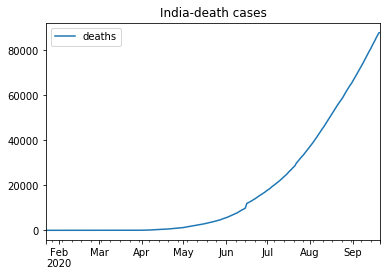

In [11]:
data2.plot(title="India-death cases")

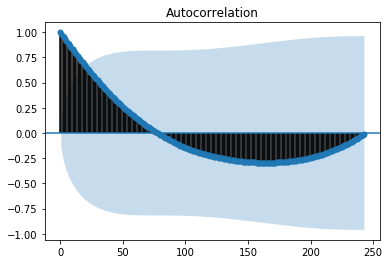

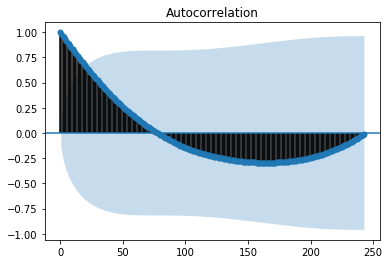

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data2)

In [13]:
country = "US"

In [14]:
data10 = data5[data5["Country/Region"] == country]
data10

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
242,NaN,US,40.0,-100.0,1,1,2,2,5,5,...,6485123,6520122,6553652,6592342,6630051,6674411,6723933,6768119,6804814,6856884


In [15]:
## structuring times eries data
data3 = pd.DataFrame(data10[data10.columns[4:]].sum(),columns=["confirmed"])
data3.index = pd.to_datetime(data3.index,format='%m/%d/%y')
data3.head()

,confirmed
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5


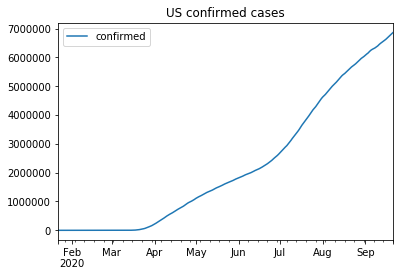

In [16]:
data3.plot(title="US confirmed cases")

In [17]:
country = "Brazil"

In [18]:
data11 = data6[data6["Country/Region"] == country]
data11

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
30,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,3723206,3723206,3770138,3811505,3845464,3873934,3897539,3936893,3963446,3993432


In [19]:
## structuring times eries data
data4 = pd.DataFrame(data11[data11.columns[4:]].sum(),columns=["recovered"])
data4.index = pd.to_datetime(data4.index,format='%m/%d/%y')
data4.head()

,recovered
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


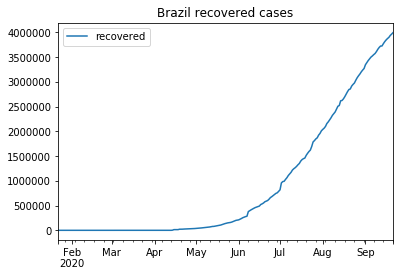

In [20]:
data4.plot(title="Brazil recovered cases")

In [21]:
##join confirmed with dead
total = data2.join(data3,how = "inner")
total

,deaths,confirmed
2020-01-22,0,1
2020-01-23,0,1
2020-01-24,0,2
2020-01-25,0,2
2020-01-26,0,5
...,...,...
2020-09-17,84372,6674411
2020-09-18,85619,6723933
2020-09-19,86752,6768119
2020-09-20,87882,6804814


In [22]:
total1 = total.join(data4,how = "inner")
total1

,deaths,confirmed,recovered
2020-01-22,0,1,0
2020-01-23,0,1,0
2020-01-24,0,2,0
2020-01-25,0,2,0
2020-01-26,0,5,0
...,...,...,...
2020-09-17,84372,6674411,3873934
2020-09-18,85619,6723933,3897539
2020-09-19,86752,6768119,3936893
2020-09-20,87882,6804814,3963446


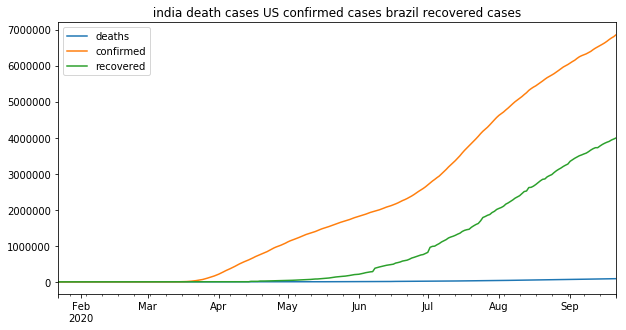

In [23]:
total1.plot(figsize=(10,5),title=" india death cases US confirmed cases brazil recovered cases ")

In [24]:
import folium
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(data['Lat'],data['Long'],data['1/27/20'],data['Country/Region']):
    folium.CircleMarker([lat,long],radius=value*0.007,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.09).add_to(map)
    

In [25]:
map

In [26]:
data =data.drop(["Province/State","Lat","Long"],1).groupby('Country/Region').sum()
data = data[data.iloc[:,-1] > 300]
all_data = data.T
all_data.tail(50)

Country/Region,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,Belarus,...,Switzerland,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uzbekistan,Venezuela,Yemen,Zambia
8/3/20,1288,172,1239,3813,762,232,718,468,3184,571,...,1981,5747,156082,1762,351,41293,157,180,499,171
8/4/20,1288,176,1248,3979,768,247,719,473,3234,574,...,1981,5765,157460,1788,351,41311,165,187,506,173
8/5/20,1294,182,1261,4106,770,255,719,476,3267,577,...,1984,5784,158836,1813,353,41325,171,195,508,176
8/6/20,1298,188,1273,4251,772,266,719,479,3306,580,...,1985,5798,160089,1846,354,41343,175,202,508,199
8/7/20,1307,189,1282,4411,777,278,720,483,3333,583,...,1986,5813,161331,1879,356,41355,181,208,512,200
8/8/20,1312,193,1293,4523,785,295,721,488,3365,585,...,1986,5829,162408,1906,356,41358,187,215,512,203
8/9/20,1312,199,1302,4606,791,313,721,490,3399,587,...,1986,5844,162919,1925,357,41363,194,223,515,235
8/10/20,1328,200,1312,4764,796,331,723,492,3438,589,...,1987,5858,163446,1950,357,41381,200,229,518,241
8/11/20,1344,205,1322,5004,803,352,723,495,3471,592,...,1990,5873,164510,1979,358,41394,204,238,523,241
8/12/20,1354,208,1333,5213,806,361,724,497,3513,595,...,1991,5891,166015,1999,358,41414,211,247,528,246


In [27]:
z = all_data.loc['9/21/20',:]
print(z)


Country/Region
Afghanistan        1444
Albania             364
Algeria            1679
Argentina         13482
Armenia             936
                  ...  
United Kingdom    41877
Uzbekistan          437
Venezuela           555
Yemen               586
Zambia              331
Name: 9/21/20, Length: 85, dtype: int64


In [28]:
z1 = pd.DataFrame(z)
z1

,9/21/20
Country/Region,
Afghanistan,1444
Albania,364
Algeria,1679
Argentina,13482
Armenia,936
...,...
United Kingdom,41877
Uzbekistan,437
Venezuela,555


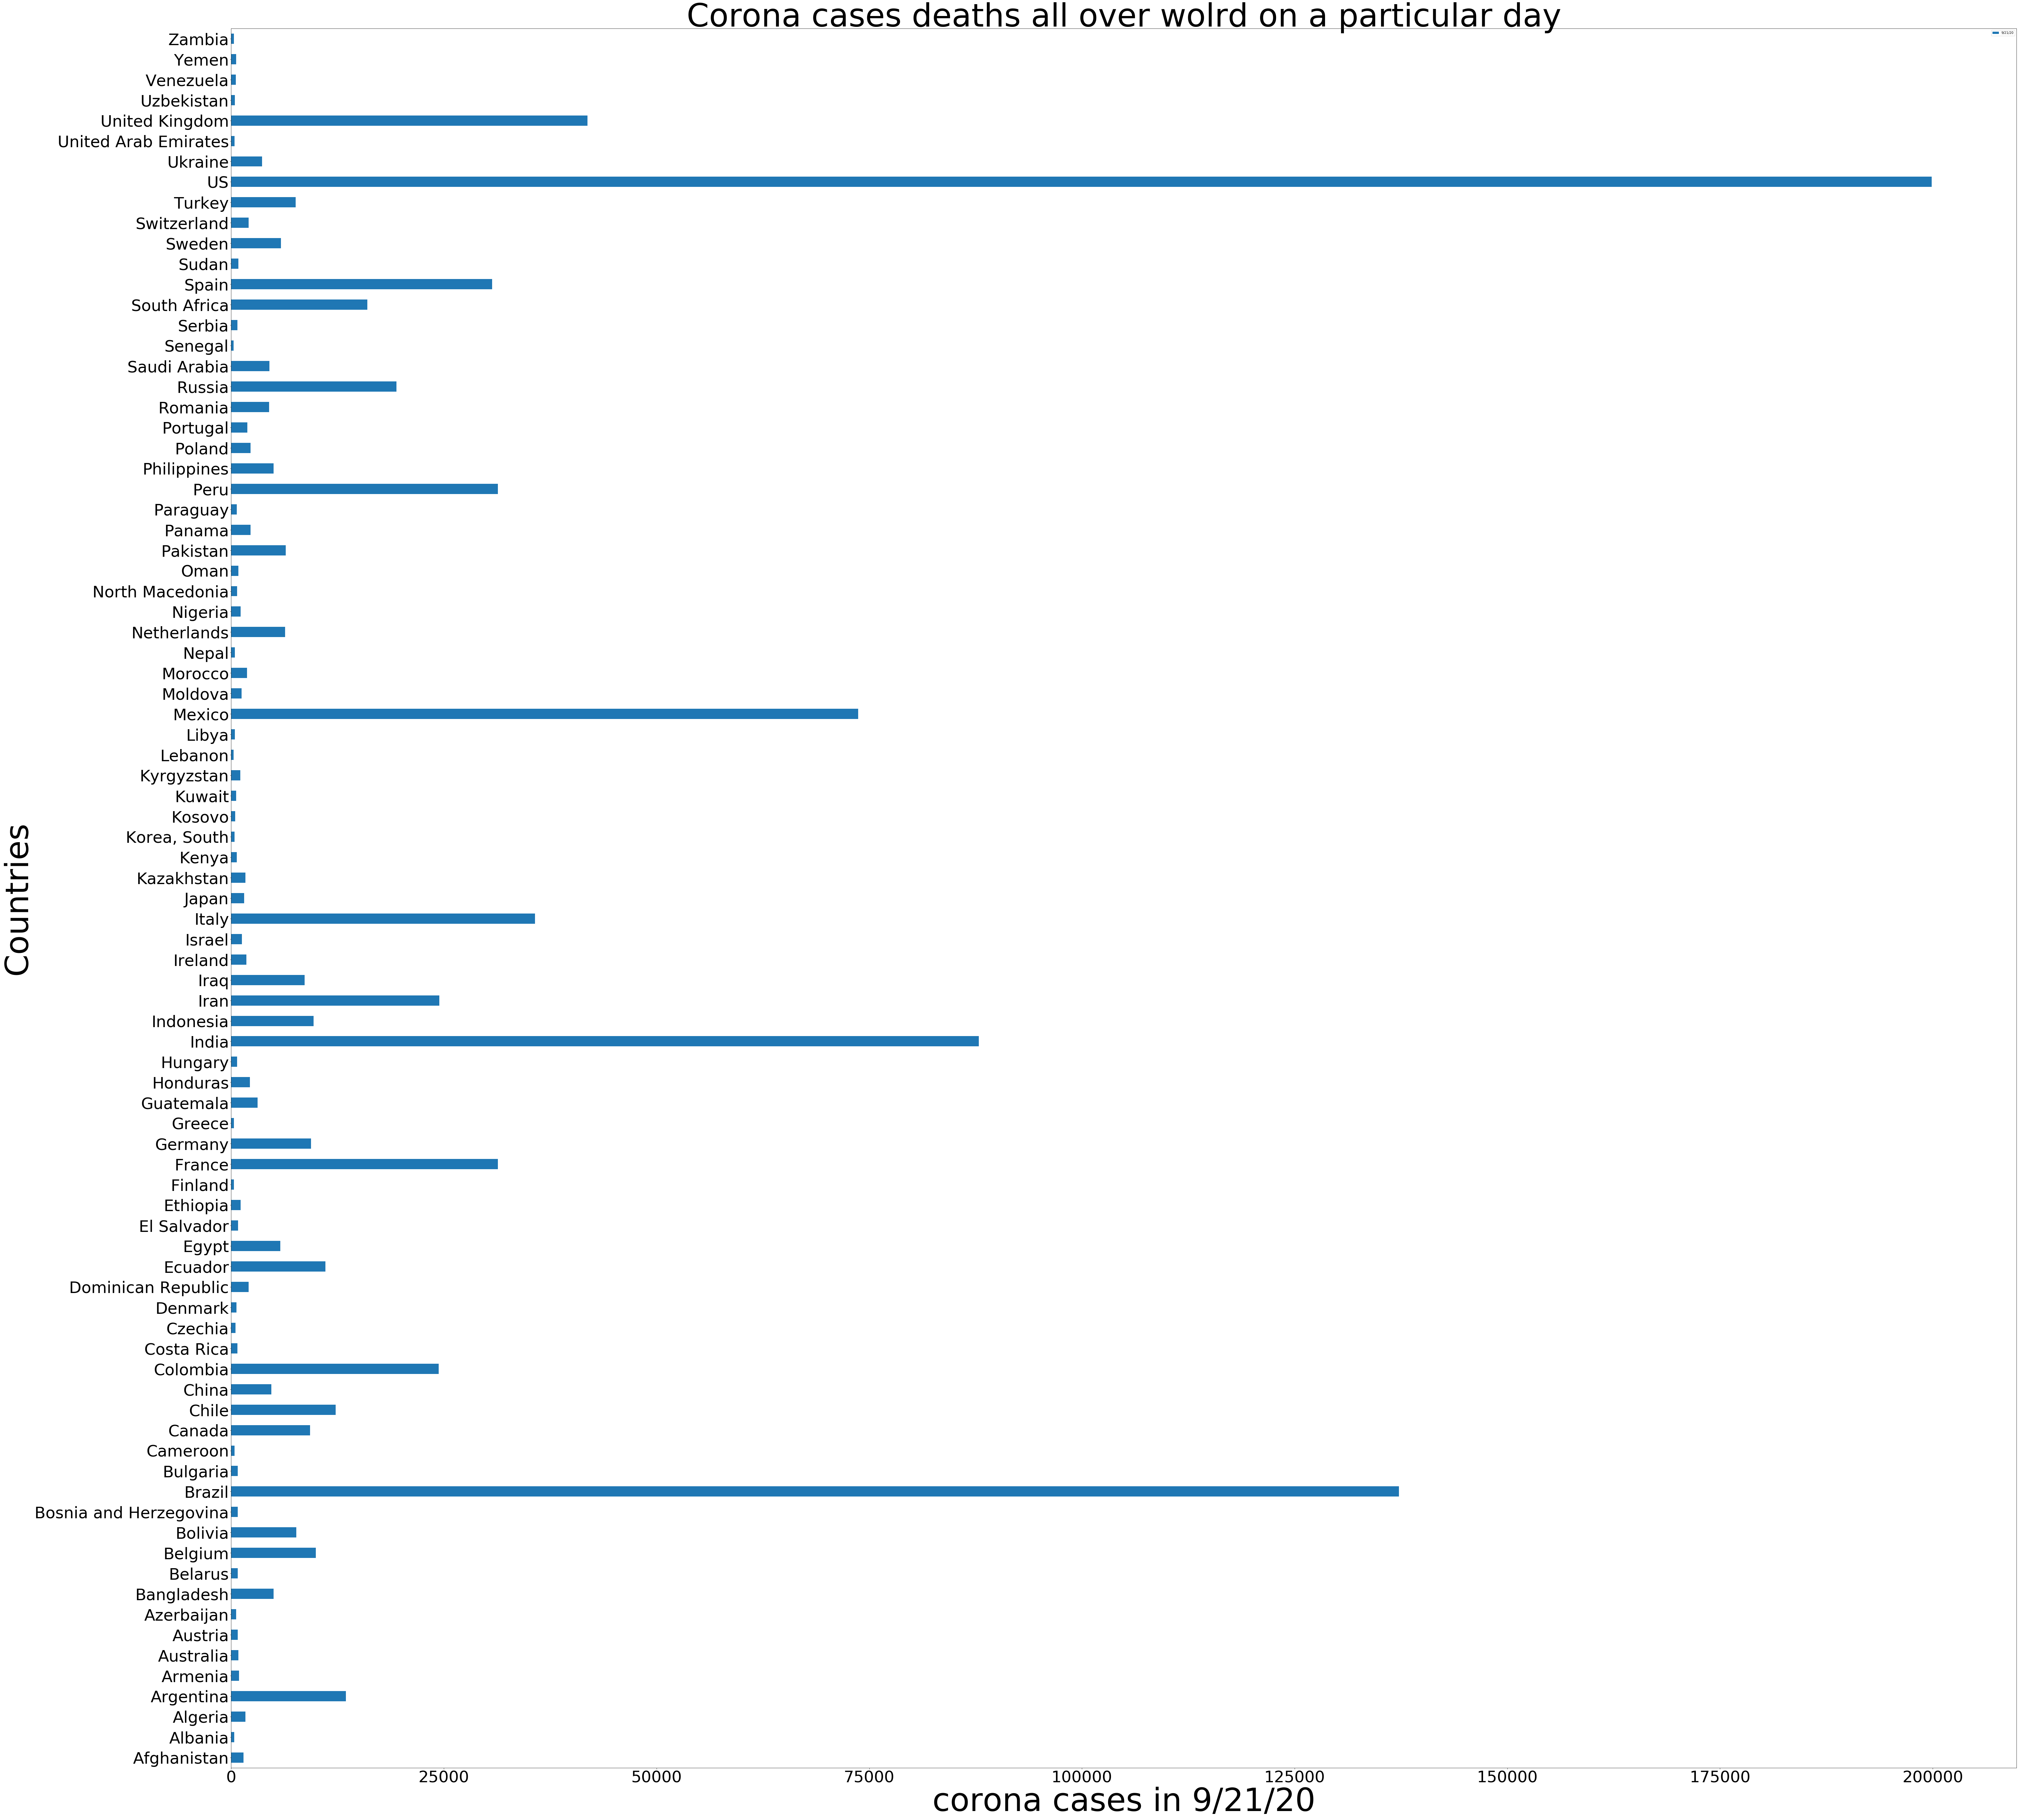

In [38]:
z1.plot(kind="barh")
rcParams['figure.figsize']=100,100
plt.title('Corona cases deaths all over wolrd on a particular day' ,fontsize=100)
plt.xlabel('corona cases in 9/21/20', fontsize=100)
plt.ylabel('Countries', fontsize=100)
plt.tick_params(labelsize=50)

In [30]:
data15 = data2.reset_index()
data15

,index,deaths
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
239,2020-09-17,84372
240,2020-09-18,85619
241,2020-09-19,86752
242,2020-09-20,87882


In [31]:
confirmedcases = pd.DataFrame(data15['deaths'])
confirmedcases.set_index(data15['index'])

,deaths
index,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-09-17,84372
2020-09-18,85619
2020-09-19,86752


In [32]:
plotconf = data15['deaths']

In [41]:
from statsmodels.tsa.arima_model import ARIMA
model_arima=ARIMA(confirmedcases,(1,2,0))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

3154.9146624298855


In [33]:
prediction_arima=model_arima_fit.forecast(243)[0]
prediction_arima

array([ 88419.22758939,  88704.31438957,  89110.99608072,  89462.32313911,
        89842.07438386,  90210.58375437,  90586.6316104 ,  90961.32617122,
        91338.87735431,  91717.29192504,  92097.51360364,  92479.09557475,
        92862.24938831,  93246.87488353,  93633.0194827 ,  94020.6607332 ,
        94409.80926548,  94800.46004643,  95192.61545902,  95586.27437502,
        95981.43732861,  96378.10406686,  96776.27470952,  97175.94919991,
        97577.12756486,  97979.80979166,  98383.99588633,  98789.68584602,
        99196.87967209,  99605.57736388, 100015.77892171, 100427.48434544,
       100840.69363512, 101255.40679072, 101671.62381227, 102089.34469976,
       102508.56945318, 102929.29807254, 103351.53055784, 103775.26690907,
       104200.50712624, 104627.25120935, 105055.49915839, 105485.25097337,
       105916.50665429, 106349.26620115, 106783.52961394, 107219.29689267,
       107656.56803734, 108095.34304795, 108535.62192449, 108977.40466697,
       109420.69127538, 1

In [34]:
plotingconfirmed = data15.copy()
plotingconfirmed = pd.DataFrame(plotingconfirmed)

In [35]:
oneweekdates = ['2020/01/15','2020/02/16','2020/03/17','2020/04/18','2020/05/19','2020/06/20','2020/07/21']

In [36]:
j=1
for i in range(len(oneweekdates)):
    plotingconfirmed.loc[66+j,'index'] = oneweekdates[i]
    plotingconfirmed.loc[66+j,'deaths'] =int(prediction_arima[i])
    j=j+1

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text xticklabel objects>)

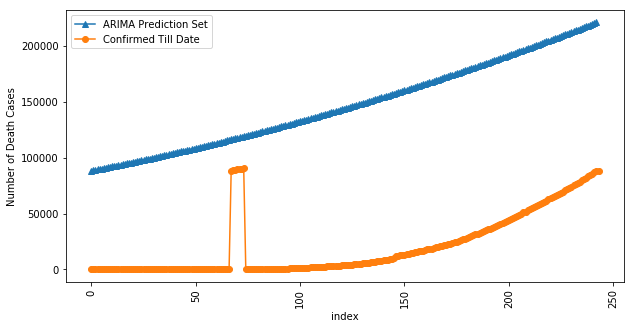

In [37]:
plt.figure(figsize=(10,5))
plt.plot(prediction_arima,label="ARIMA Prediction Set",marker="^")
plt.plot(plotingconfirmed["deaths"],label="Confirmed Till Date",marker="o")
plt.legend()
plt.xlabel("index")
plt.ylabel("Number of Death Cases")
plt.xticks(rotation=90)